<h1 style='text-align: center;''>STATISTICAL ANALYSIS AND VISUALIZATIONS</h1>

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [95]:
# importing Dataset from kaggle in CSV format
data=pd.read_csv('../Desktop/INC 5000 Companies 2019.csv')

## Data Understanding

In [96]:
data.columns

Index(['rank', 'profile', 'name', 'url', 'state', 'revenue', 'growth_%',
       'industry', 'workers', 'previous_workers', 'founded', 'yrs_on_list',
       'metro', 'city'],
      dtype='object')

In [97]:
data.head()

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [98]:
# get information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


### Revenue_in_million
- Description: Revenue of the company, standardized to millions.
- Source: Original `revenue` column with mixed units (millions and billions).
- Transformation: All values in billions were converted to millions (e.g., "2 Billion" to "2000")

In [99]:
contains_million = data['revenue'].str.contains('Million', case=False, na=False).any()
contains_billion = data['revenue'].str.contains('billion', case=False, na=False).any()

if contains_million and contains_billion:
    print("The 'revenue' column contains both Million and Billion values.")
elif contains_million:
    print("The 'revenue' column contains only Million values.")
elif contains_billion:
    print("The 'revenue' column contains only Billion values.")
else:
    print("The 'revenue' column does not contain Million or Billion values.")

The 'revenue' column contains both Million and Billion values.


In [100]:
def convert_to_millions(value):
    value = value.lower()
    if 'billion' in value:
        return float(value.replace(' billion', '').strip()) * 1e3 
    elif 'million' in value:
        return float(value.replace(' million', '').strip())
    else:
        return float(value) / 1e6

In [101]:
data['revenue_in_million'] = data['revenue'].apply(convert_to_millions)

In [102]:
data['revenue_in_million'] = data['revenue_in_million'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [103]:
data.drop('revenue', axis=1, inplace=True)

### Region
- Description: Geographic region of the United States where each company is located. This groups individual states into broader regions, facilitating regional analysis.
- Source: Original `state` column, which lists the state abbreviations for each company's headquarters.
- Transformation: Each state is mapped to a region based on commonly used U.S. regional groupings:
    - West: CA, CO, HI, ID, MT, NV, OR, UT, WA, WY
    - Midwest: OH, WI, MI, MN, KS, IL, ND, MO, IN, NE, IA, SD
    - Northeast: CT, DC, DE, MA, MD, ME, NH, NJ, NY, PA, RI, VT
    - Southeast: AL, AR, FL, GA, KY, LA, MS, NC, PR, SC, TN, VA, WV
    - Southwest: AZ, NM, OK, TX

In [104]:
state_to_region = {
    'CA': 'West', 'CO': 'West', 'HI': 'West', 'ID': 'West', 'MT': 'West',
    'NV': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West',
    'OH': 'Midwest', 'WI': 'Midwest', 'MI': 'Midwest', 'MN': 'Midwest', 'KS': 'Midwest',
    'IL': 'Midwest', 'ND': 'Midwest', 'MO': 'Midwest', 'IN': 'Midwest', 'NE': 'Midwest',
    'IA': 'Midwest', 'SD': 'Midwest',
    'CT': 'Northeast', 'DC': 'Northeast', 'DE': 'Northeast', 'MA': 'Northeast', 'MD': 'Northeast',
    'ME': 'Northeast', 'NH': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast',
    'AL': 'Southeast', 'AR': 'Southeast', 'FL': 'Southeast', 'GA': 'Southeast', 'KY': 'Southeast',
    'LA': 'Southeast', 'MS': 'Southeast', 'NC': 'Southeast', 'PR': 'Southeast', 'SC': 'Southeast',
    'TN': 'Southeast', 'VA': 'Southeast', 'WV': 'Southeast',
    'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest', 'TX': 'Southwest'
}

In [105]:
data['region'] = data['state'].map(state_to_region)

In [106]:
data

,rank,profile,name,url,state,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city,revenue_in_million,region
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix,36.9,Southwest
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood,33.6,Southeast
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin,24.9,Southwest
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque,32.4,Southwest
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia,22.5,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,4996,https://www.inc.com/profile/village-plumbing-air,Village Plumbing & Air,villageplumbing.com,TX,52.2377,Consumer Products & Services,88.0,62,1946,3,Houston,Houston,15.8,Southwest
5008,4997,https://www.inc.com/profile/real-restoration-g...,Real Restoration Group,realrestoration.com,IL,52.2127,Construction,380.0,220,2011,1,Chicago,Chicago,11.6,Midwest
5009,4998,https://www.inc.com/profile/naval-systems,Naval Systems,n-s-i.us,MD,52.2037,Government Services,187.0,127,2004,1,NaN,LEXINGTON PARK,29.7,Northeast
5010,4999,https://www.inc.com/profile/hnm-systems,HNM Systems,hnmsystems.com,CA,52.1919,Telecommunications,132.0,47,2011,1,San Diego,Solana Beach,8.8,West


# Average Revenue Analysis:

In [107]:
overall_avg_revenue = data["revenue_in_million"].mean()
rounded_avg_revenue = round(overall_avg_revenue, 2)
formatted_avg_revenue = f"${rounded_avg_revenue:,.2f} Million"
print("Average Revenue:", formatted_avg_revenue) 

Average Revenue: $47.47 Million


### Revenue varies across different industries
- Description: Groups the data by industry, calculates the average revenue for each industry, formats the values as currency strings, and sorts the results in descending order by revenue. 
- Advantage: In this case we can see which industries have the highest average revenue.


In [108]:
data.groupby("industry")["revenue_in_million"].mean().round(2).sort_values(ascending=False).map("${:,.2f} Million".format).reset_index()

,industry,revenue_in_million
0,Security,$123.75 Million
1,Health,$109.33 Million
2,Logistics & Transportation,$101.29 Million
3,Energy,$80.22 Million
4,Human Resources,$73.58 Million
5,Consumer Products & Services,$72.07 Million
6,Retail,$66.55 Million
7,Government Services,$59.39 Million
8,Insurance,$58.74 Million
9,Construction,$58.42 Million


# Industry Representation:

In [109]:
data[['industry']].value_counts().sort_values(ascending=False).reset_index()

,industry,count
0,Business Products & Services,492
1,Advertising & Marketing,489
2,Software,461
3,Health,356
4,Construction,350
5,Consumer Products & Services,315
6,IT Management,276
7,Financial Services,239
8,Government Services,236
9,Real Estate,198


In [110]:
most_represented_industry = data['industry'].value_counts().idxmax()
most_represented_count = data['industry'].value_counts().max()

least_represented_industry = data['industry'].value_counts().idxmin()
least_represented_count = data['industry'].value_counts().min()

print('Most Represented Industry:', most_represented_industry, 'with', most_represented_count, 'companies')
print('Least Represented Industry:', least_represented_industry, 'with', least_represented_count, 'companies')

Most Represented Industry: Business Products & Services with 492 companies
Least Represented Industry: Computer Hardware with 32 companies


### Industry Count Distribution (Horizontal)
- This horizontal bar chart shows the number of companies/entities in each industry, providing a clear comparison of industry representation. 

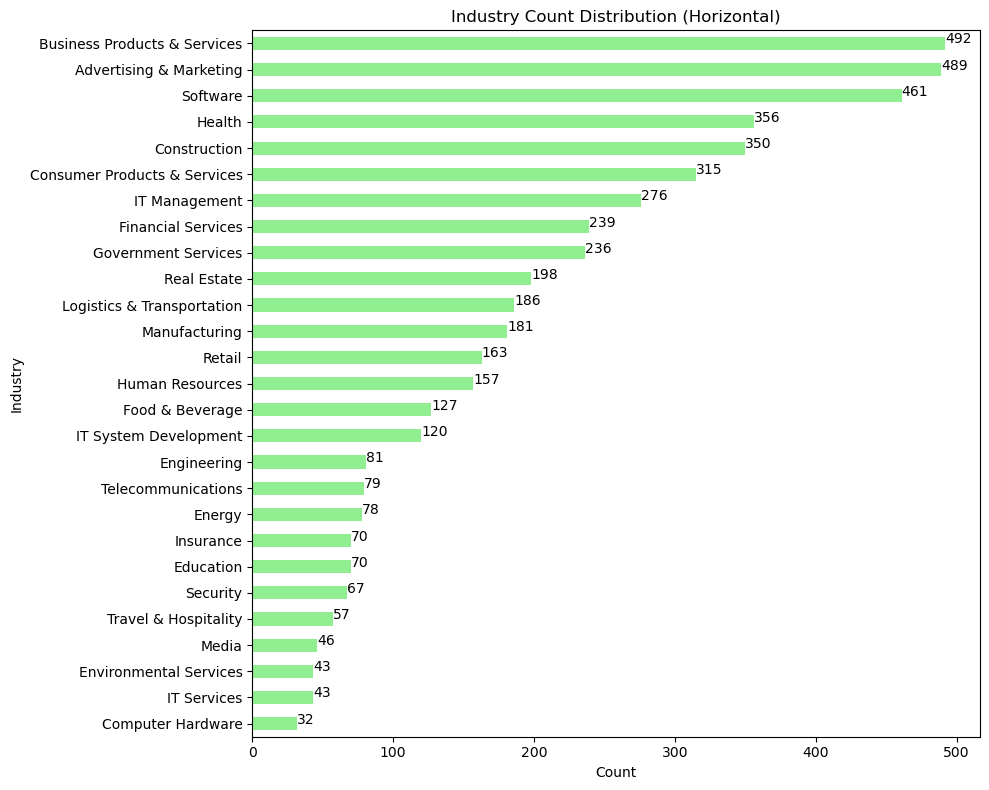

In [111]:
industry_counts = data['industry'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
industry_counts.plot(kind='barh', color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('Industry Count Distribution (Horizontal)')
plt.gca().invert_yaxis()  # Largest counts on top

for index, value in enumerate(industry_counts):
    plt.text(value, index, str(value))  # Display the count at the end of each bar

plt.tight_layout()
plt.show()

# Geographic Trends:

### Top 10 States by Company Count
- This chart visually confirms that states like California, Texas, and Florida lead in company counts, while several other states have much lower representation.

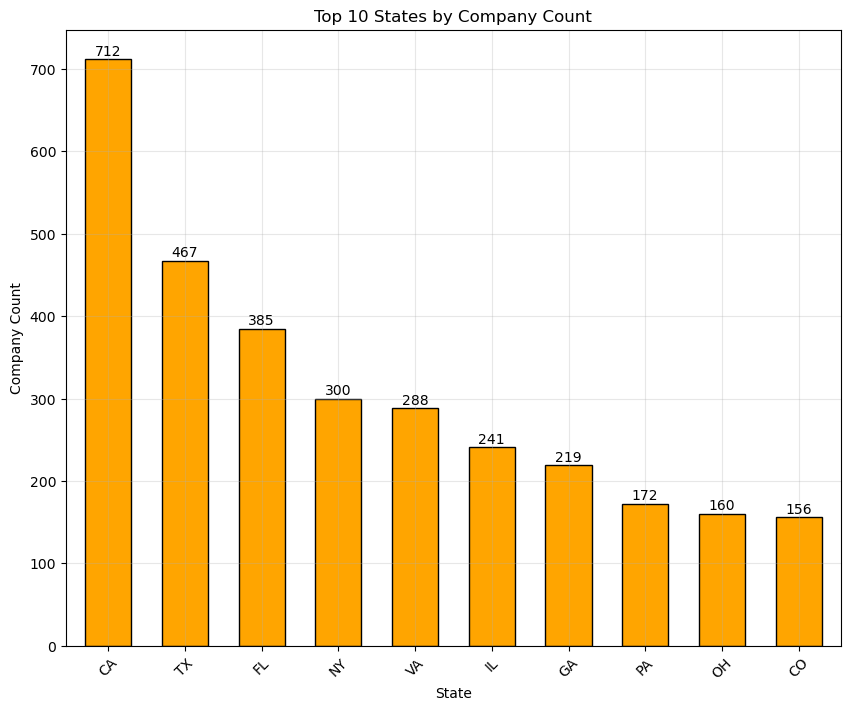

In [112]:
top_states = data['state'].value_counts().head(10)

plt.figure(figsize=(10, 8))
top_states.plot(kind='bar', color='orange',edgecolor='black', width=0.6)
plt.title("Top 10 States by Company Count")
plt.xlabel("State")
plt.ylabel("Company Count")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

for i, count in enumerate(top_states):
    plt.text(i, count + 5, f"{count}", ha='center', color='black')
    
plt.show()

### Correlation Between Company Count and Average Growth Rate by State
- The correlation value of -0.05 indicates a very weak negative relationship between the number of companies in a state and their average growth rate. This means that, for this dataset, an increase in the number of companies does not necessarily lead to higher growth rates.

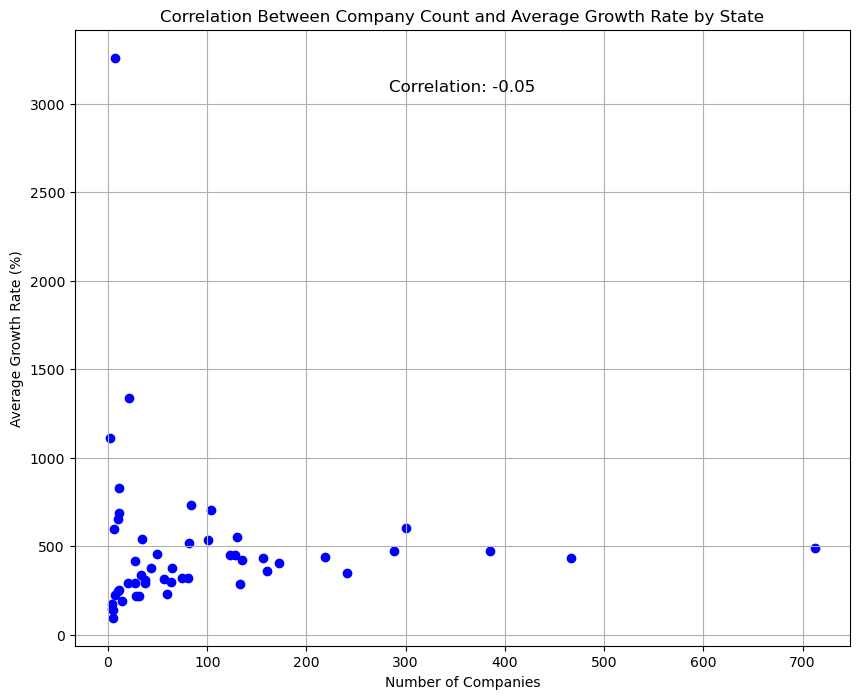

In [113]:
state_growth_and_count = data.groupby('state').agg({'growth_%': 'mean', 'state': 'count'}).rename(columns={'state': 'CompanyCount'})

# Calculate correlation
correlation = state_growth_and_count.corr().iloc[0, 1]  # correlation between CompanyCount and growth rate

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(state_growth_and_count['CompanyCount'], state_growth_and_count['growth_%'], color='blue')
plt.title('Correlation Between Company Count and Average Growth Rate by State')
plt.xlabel('Number of Companies')
plt.ylabel('Average Growth Rate (%)')

# Show correlation value
plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, ha='center', fontsize=12)
plt.grid()
plt.show()

### Total Revenue by Region
- Description: The revenue distribution across regions provides an overview of economic concentration. High percentages in regions like the Southeast may indicate robust business activity or a higher presence of large revenue-generating companies in those areas.
- Advantage: This visualization helps stakeholders understand how revenue is spread geographically, allowing them to target or prioritize regions for future growth strategies or investments.

In [114]:
total_revenue_by_region=data.groupby('region')['revenue_in_million'].sum().round(2).sort_values(ascending=False).map("${:,.2f} Million".format).reset_index()
total_revenue_by_region

,region,revenue_in_million
0,Southeast,"$60,267.70 Million"
1,Midwest,"$59,351.00 Million"
2,West,"$56,809.40 Million"
3,Northeast,"$38,160.30 Million"
4,Southwest,"$23,335.40 Million"


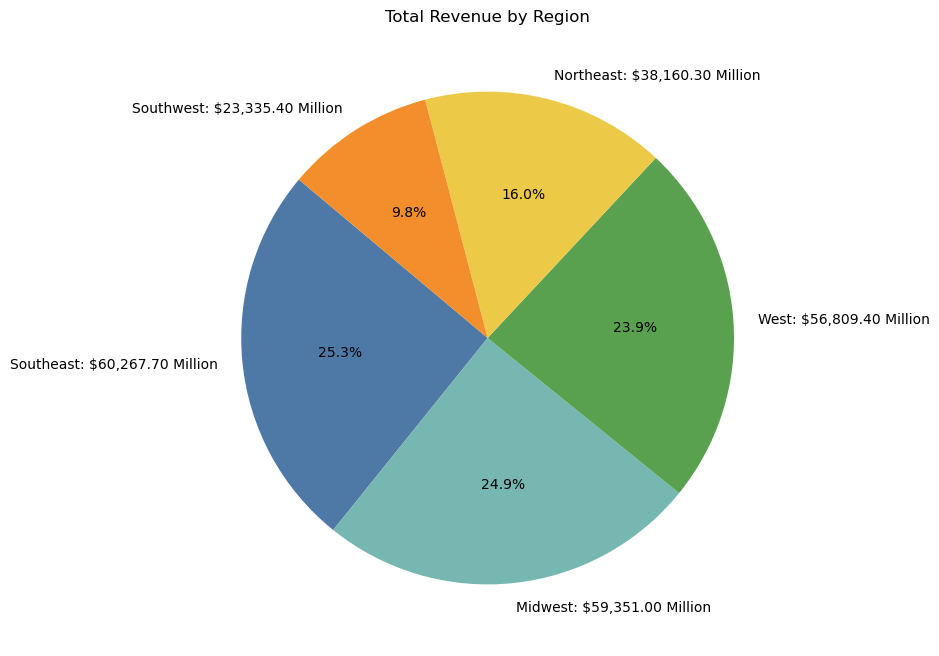

In [115]:
total_revenue_by_region_for_pie = data.groupby('region')['revenue_in_million'].sum().sort_values(ascending=False)
colors = ['#4e79a7', '#76b7b2', '#59a14f', '#edc948', '#f28e2b']

plt.figure(figsize=(8, 8))
plt.pie(
    total_revenue_by_region_for_pie,
    labels=[f"{region}: ${value:,.2f} Million" for region, value in total_revenue_by_region_for_pie.items()],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Total Revenue by Region")
plt.show()


# Industry Growth Rate:

### Average Growth Rate for Each Industry
- The `average_growth_by_industry` calculation shows the average growth rate for each industry, giving a clear view of which industries had higher or lower growth on average.This summary helps identify sectors with significant expansion or those with slower growth, offering insights into industry performance trends for 2019.

In [116]:
average_growth_by_industry=data.groupby('industry')["growth_%"].mean().round(2).sort_values(ascending=False).reset_index()
average_growth_by_industry

,industry,growth_%
0,Logistics & Transportation,717.56
1,Consumer Products & Services,685.64
2,Food & Beverage,668.23
3,Computer Hardware,651.98
4,Energy,592.08
5,Retail,584.82
6,Health,546.91
7,Software,524.67
8,Telecommunications,515.41
9,Security,490.19


### Top 5 Industries by Average Growth Rate
- The top 5 fastest-growing industries in 2019 were Logistics & Transportation, Consumer Products & Services, Food & Beverage, Computer Hardware, and Energy. High demand, innovation, and evolving consumer trends likely drove this growth, with each industry showing robust expansion above 590% on average.

In [117]:
top_5_industries=average_growth_by_industry.sort_values(by='growth_%', ascending=False).head(5)
top_5_industries

,industry,growth_%
0,Logistics & Transportation,717.56
1,Consumer Products & Services,685.64
2,Food & Beverage,668.23
3,Computer Hardware,651.98
4,Energy,592.08


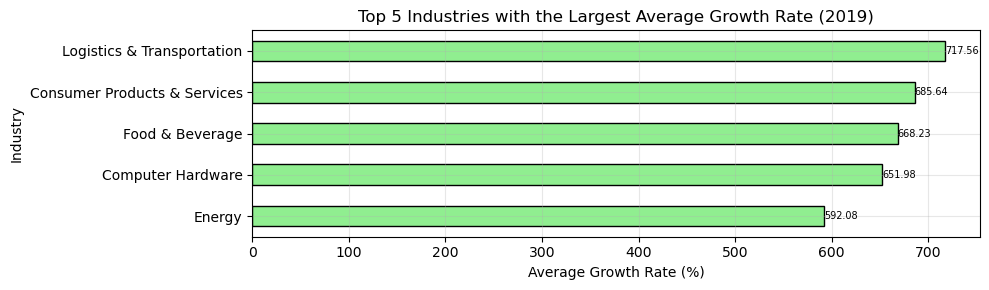

In [118]:
plt.figure(figsize=(10, 3))
plt.barh(top_5_industries['industry'], top_5_industries['growth_%'], color='lightgreen', edgecolor='black',height=0.5)
plt.xlabel('Average Growth Rate (%)')
plt.ylabel('Industry')
plt.title('Top 5 Industries with the Largest Average Growth Rate (2019)')
plt.ylim(-0.5, len(top_5_industries) - 0.5)  # Tightening the y-limits around the bars
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.2, right=0.95, hspace=0.1)
plt.gca().invert_yaxis() 
# Adding growth rate labels at the end of each bar
for index, value in enumerate(top_5_industries['growth_%']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=7)  # Display the growth rate at the end of each bar
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Outlier Analysis
- Based on the IQR method, there are no outliers in average growth rates among industries, indicating that the growth distribution is fairly consistent without extreme high or low values.

In [119]:
Q1 = average_growth_by_industry["growth_%"].quantile(0.25)
Q3 = average_growth_by_industry["growth_%"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = average_growth_by_industry[(average_growth_by_industry["growth_%"] < lower_bound) | (average_growth_by_industry["growth_%"] > upper_bound)]

outlier_count = outliers.shape[0]
print("Number of outliers:", outlier_count)

Number of outliers: 0


# Staff Growth:

### Top Company by Staff Increase from 2018 to 2019
- The result highlights the top 10 companies with the most significant workforce expansions from 2018 to 2019.
- Security and Business Services companies show substantial hiring, with leaders like Allied Universal and Alorica adding tens of thousands of employees.

In [120]:
data['staff_increase'] = data['workers'] - data['previous_workers']

top_staff_increase = data.sort_values(by='staff_increase', ascending=False)

top_staff_increase[['rank', 'name', 'industry', 'state', 'workers', 'previous_workers', 'staff_increase']].head(10)

,rank,name,industry,state,workers,previous_workers,staff_increase
1621,1617,Allied Universal,Security,CA,155000.0,36469,118531.0
3752,3743,Alorica,Business Products & Services,CA,96000.0,53000,43000.0
3403,3394,Infiniti HR,Human Resources,MD,58145.0,21000,37145.0
1336,1333,CircusTrix,Advertising & Marketing,UT,14730.0,991,13739.0
3172,3164,ScribeAmerica,Health,FL,20599.0,8958,11641.0
1118,1115,TaskUs,Business Products & Services,CA,14098.0,4900,9198.0
4110,4101,Freddy's Frozen Custard,Food & Beverage,KS,13751.0,7257,6494.0
427,427,Pathway Vet Alliance,Health,TX,4572.0,398,4174.0
2927,2919,Four Foods Group,Food & Beverage,UT,4500.0,1000,3500.0
4985,4974,Pacific Dental Services,Health,CA,10392.0,7036,3356.0


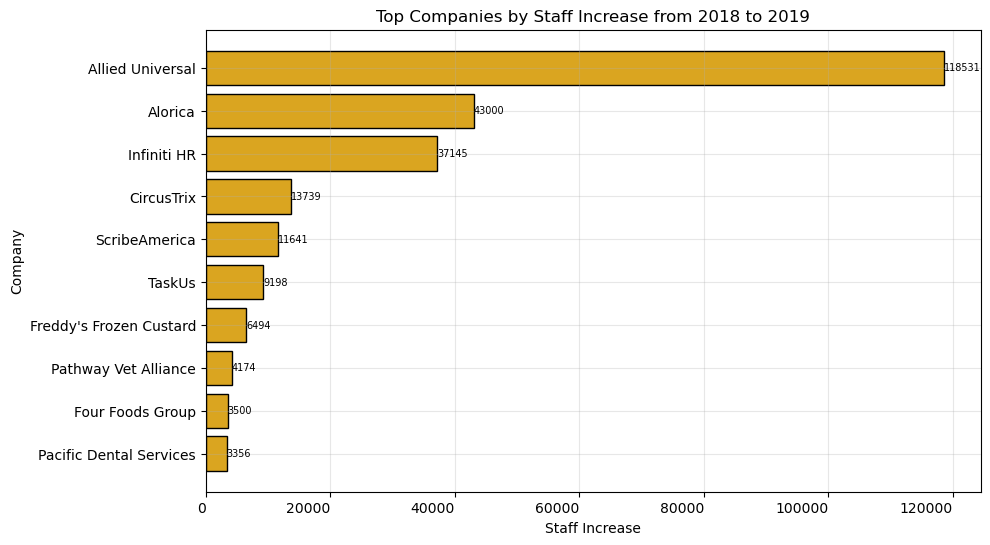

In [121]:
plt.figure(figsize=(10, 6))
top_10_staff_increase = top_staff_increase.head(10)
plt.barh(top_10_staff_increase['name'], top_10_staff_increase['staff_increase'],edgecolor='black', color='goldenrod')
plt.xlabel('Staff Increase')
plt.ylabel('Company')
plt.title('Top Companies by Staff Increase from 2018 to 2019')
plt.xticks(rotation=0, ha='right')
plt.gca().invert_yaxis()
for index, value in enumerate(top_10_staff_increase['staff_increase']):
    plt.text(value, index, f'{value:.0f}', va='center', fontsize=7)
plt.grid(alpha=0.3)
plt.show()

### Top Industry by Staff Increase from 2018 to 2019
- The chart reveals which industries experienced the largest overall workforce growth. Industries at the top of the chart, such as Security and Business Services, show the greatest hiring activity, indicating rising demand for roles in these fields. Other industries with significant growth include Health, Human Resources, and Advertising & Marketing, suggesting these sectors are also expanding rapidly.

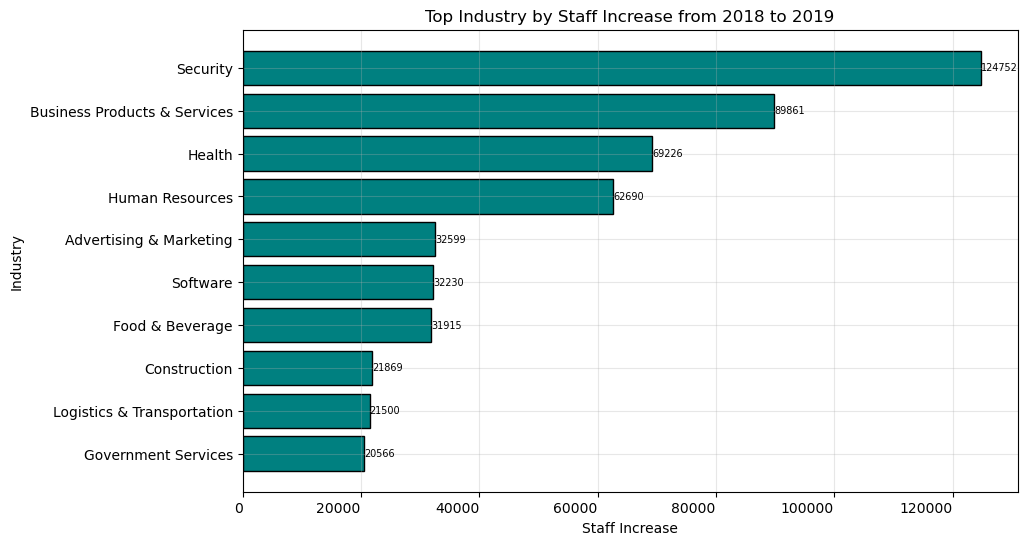

In [122]:
plt.figure(figsize=(10, 6))
industry_staff_increase = data.groupby('industry')['staff_increase'].sum().sort_values(ascending=False)
top_10_industries = industry_staff_increase.head(10)
plt.barh(top_10_industries.index, top_10_industries.values,edgecolor='black', color='teal')
plt.xlabel('Staff Increase')
plt.ylabel('Industry')
plt.title('Top Industry by Staff Increase from 2018 to 2019')
plt.xticks(rotation=0, ha='right')
plt.gca().invert_yaxis()
for index, value in enumerate(top_10_industries.values):
    plt.text(value, index, f'{value:.0f}', va='center', fontsize=7)
plt.grid(alpha=0.3)
plt.show()

# Revenue vs. Staff Trends:

### Revenue Growth with Reduced Staff
- The result identifies companies that successfully increased revenue while reducing staff. This often indicates improved operational efficiency, automation, or a strategic shift toward higher-margin activities.

In [123]:
increased_revenue_reduced_staff = data[(data['staff_increase'] < 0) & (data['revenue_in_million'] > 0)]

result = increased_revenue_reduced_staff[['name', 'industry', 'state', 'revenue_in_million', 'staff_increase']].sort_values(by='staff_increase',ascending=True)
result

,name,industry,state,revenue_in_million,staff_increase
4567,IDS International Government Services,Government Services,VA,44.7,-682.0
1076,Prime Therapeutics,Health,MN,21400.0,-600.0
4409,Akorbi,Business Products & Services,TX,39.3,-300.0
4136,First American Payment Systems,Financial Services,TX,783.9,-243.0
4270,Integrity Services,Business Products & Services,MA,19.3,-150.0
...,...,...,...,...,...
2966,Alpha Premier,Construction,TX,2.6,-1.0
3194,Rabbit Air,Consumer Products & Services,CA,18.4,-1.0
3799,Cuddle Clones,Consumer Products & Services,KY,3.5,-1.0
4657,Klemchuk,Business Products & Services,TX,4.5,-1.0


### Analysis of Revenue Growth with Reduced Workforce Across Industries and States
- Code generates two side-by-side pie charts to analyze the trend of revenue growth with reduced staff across industries and states.
- The first pie chart shows the proportion of the top 5 industries where companies achieved revenue growth while reducing staff.
- The second pie chart represents the top 5 states with the most companies following this trend.

In [124]:
industry_trend = increased_revenue_reduced_staff['industry'].value_counts().sort_values(ascending=False).head(5)
region_trend = increased_revenue_reduced_staff['state'].value_counts().sort_values(ascending=False).head(5)

In [125]:
print("Trend by Industry:")
print(industry_trend)
print("\nTrend by Region:")
print(region_trend)

Trend by Industry:
industry
Software                   14
Advertising & Marketing    11
Financial Services          7
Manufacturing               7
IT Management               7
Name: count, dtype: int64

Trend by Region:
state
CA    19
NY    10
TX    10
PA     7
VA     6
Name: count, dtype: int64


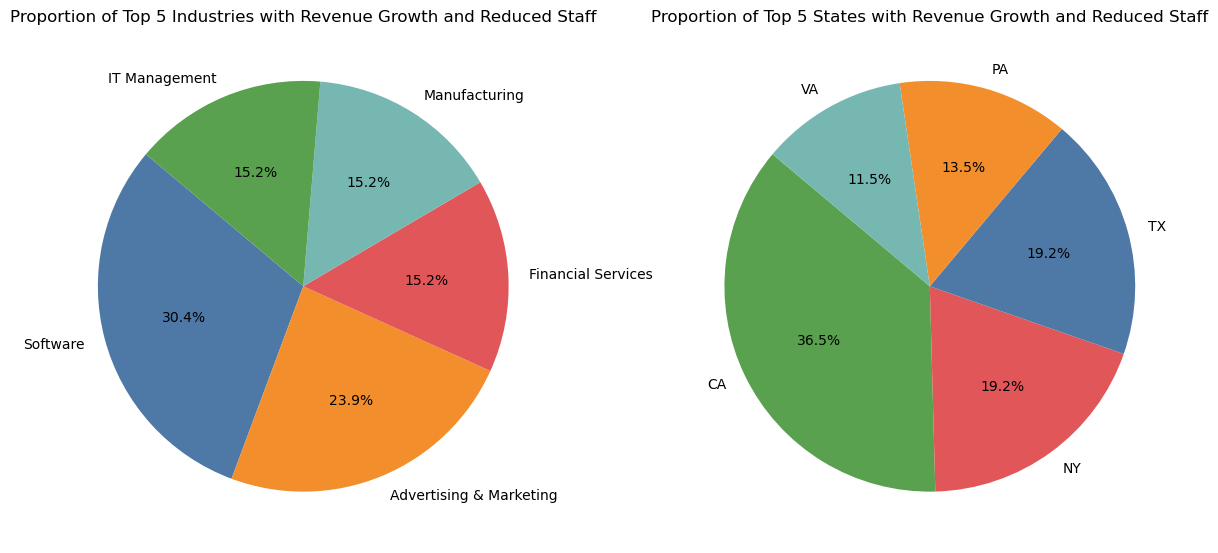

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(
    industry_trend.values,
    labels=industry_trend.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']
)
ax1.set_title("Proportion of Top 5 Industries with Revenue Growth and Reduced Staff")

ax2.pie(
    region_trend.values,
    labels=region_trend.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#59a14f','#e15759', '#4e79a7', '#f28e2b', '#76b7b2']
)
ax2.set_title("Proportion of Top 5 States with Revenue Growth and Reduced Staff")

plt.tight_layout()
plt.show()

### Relationship between Revenue Growth and Staffing Changes
- Positive Correlation (0.57): There’s a moderate positive correlation (0.57) between revenue growth (revenue_in_million) and staffing changes (staff_increase). This suggests that, generally, as revenue grows, there tends to be an increase in staffing, indicating that some industries may expand their workforce to support higher revenue.

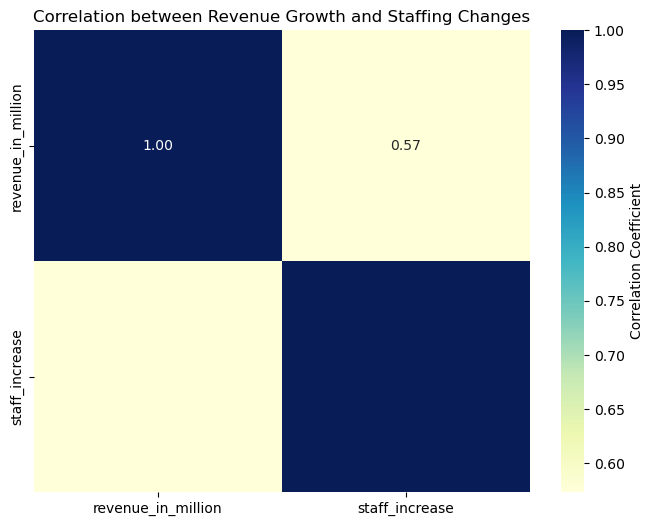

In [127]:
correlation_data = data.pivot_table(values=['revenue_in_million', 'staff_increase'], index='industry', aggfunc='mean').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation between Revenue Growth and Staffing Changes")
plt.show()